<h1>
<span style="color:blue">Noelia Quishpe</span>
</h1>

### IA - Estudio de caso:

A usted se la ha pedido que desarrolle una aplicación que pueda reconocer la actividad que está realizando una persona con los datos tomados por el acelerógrafo de su celular. Parte del equipo ya realizó la recolección y extracción de las características para cinco diferentes actividades físicas humanas: Sentarse, estar de pie, caminar, correr y bailar.  Al final del trabajo, se quedaron con 60 características por observación, extraídas de la aceleración de las mediciones de los sensores de acelerómetro de varios teléfonos inteligentes. A usted se le entrega aproximadamente 25000 registros con 60 características incluido el tipo de actividad y se le pide que proponga una solución para que reconozca la actividad. 

1.	Usted hará una revisión de los datos para familiarizarse con el problema y la data. ¿qué análisis realizaría?
2.	Por ahora usted va a trabajar con los datos que le han facilitado.  Qué algoritmos usaría y cómo se asegura que los resultados son confiables y que debe hacer para confiar en ellos, explique 
3.	Explique cómo implementa la aplicación para que el sistema pueda reconocer la actividad física, explique por pasos que necesita y cómo implementarlo.
4.	Usted quiere asegurarse que todas las características entregadas están bien, pues le parece demasiadas y espera disminuir la dimensión. ¿qué puede usar? 
5.	Si solo le dieran los datos sin las cinco etiquetas (bailar, correr, ..) ¿qué haría en este caso, cómo proceder?

Los datos están en el archivo ActividadHumana.xlsx


#### complete el siguiente cuaderno, usando las indicaciones que encontrará en el mismo.

In [175]:
# Importamos todas las librerías que se necesitan. 

import pandas as pd
import numpy  as np

x_ah = pd.read_excel('ActividadHumanas.xlsx',sheet_name=3);
print('En la base existen %d registros con %d variables'  %(x_ah.shape[0], x_ah.shape[1]))
x_ah.head()

En la base existen 24075 registros con 62 variables


,TotalAccXMean,TotalAccYMean,TotalAccZMean,BodyAccXRMS,BodyAccYRMS,BodyAccZRMS,BodyAccXCovZeroValue,BodyAccXCovFirstPos,BodyAccXCovFirstValue,BodyAccYCovZeroValue,...,BodyAccXPowerBand2,BodyAccXPowerBand3,BodyAccYPowerBand1,BodyAccYPowerBand2,BodyAccYPowerBand3,BodyAccZPowerBand1,BodyAccZPowerBand2,BodyAccZPowerBand3,Actividad,label
0,0.764034,0.585142,-0.256940,0.109121,0.083456,0.036783,0.381036,-1.0,0.067645,0.222877,...,2.304699,0.000411,1.497160,1.348245,0.000273,0.291051,0.261600,0.000049,1,sentado
1,0.764064,0.585018,-0.256942,0.109209,0.083319,0.036554,0.381653,-1.0,0.066487,0.222145,...,2.310154,0.000459,1.485622,1.350188,0.000243,0.284165,0.261658,0.000052,1,sentado
2,0.764010,0.585013,-0.257079,0.108962,0.083465,0.036516,0.379924,-1.0,0.066038,0.222926,...,2.314777,0.000418,1.499559,1.346296,0.000268,0.287182,0.257530,0.000045,1,sentado
3,0.764093,0.584778,-0.257286,0.109039,0.083582,0.036911,0.380466,-1.0,0.066519,0.223550,...,2.303789,0.000408,1.497448,1.356222,0.000264,0.291062,0.265375,0.000052,1,sentado
4,0.764137,0.584614,-0.257317,0.109041,0.083301,0.036660,0.380481,-1.0,0.066725,0.222048,...,2.307175,0.000464,1.493084,1.341705,0.000243,0.287135,0.261906,0.000048,1,sentado


In [21]:
sta_ah= x_ah.describe();
sta_ah

,TotalAccXMean,TotalAccYMean,TotalAccZMean,BodyAccXRMS,BodyAccYRMS,BodyAccZRMS,BodyAccXCovZeroValue,BodyAccXCovFirstPos,BodyAccXCovFirstValue,BodyAccYCovZeroValue,...,BodyAccXPowerBand1,BodyAccXPowerBand2,BodyAccXPowerBand3,BodyAccYPowerBand1,BodyAccYPowerBand2,BodyAccYPowerBand3,BodyAccZPowerBand1,BodyAccZPowerBand2,BodyAccZPowerBand3,Actividad
count,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,...,24075.000000,24075.000000,2.407500e+04,24075.000000,24075.000000,2.407500e+04,24075.000000,24075.000000,2.407500e+04,24075.000000
mean,0.056229,0.502560,-0.234221,0.193935,0.454387,0.225730,2.452598,-1.870147,0.275687,14.200608,...,4.016825,27.270168,1.532889e-02,15.246424,166.060988,2.880110e-02,6.225484,34.673391,1.513254e-02,2.640374
std,0.230120,0.744037,0.332261,0.197572,0.487146,0.221954,3.952824,0.740147,0.581050,23.129108,...,7.886574,45.400285,6.098391e-02,27.276542,276.975722,1.094213e-01,11.582839,62.387003,5.054392e-02,1.306205
min,-0.453039,-1.244913,-0.989318,0.001369,0.002445,0.000647,0.000000,-2.700000,-0.729147,0.000000,...,0.000115,0.000456,1.114640e-12,0.000890,0.001277,1.393132e-13,0.000010,0.000114,3.480691e-14,1.000000
25%,-0.096622,0.064795,-0.272453,0.028706,0.138740,0.028787,0.026368,-2.400000,0.002904,0.615960,...,0.171658,0.163245,2.396513e-05,2.978039,3.726014,3.074152e-04,0.151364,0.169131,1.942700e-05,2.000000
50%,-0.014897,0.941564,-0.094008,0.116871,0.145899,0.138094,0.437082,-2.200000,0.043250,0.681168,...,0.943460,2.677315,1.503526e-04,4.434498,4.299131,7.566105e-04,3.629303,3.718096,6.308658e-04,2.000000
75%,0.177098,1.005345,-0.022640,0.302994,0.880149,0.335487,2.937767,-1.000000,0.286172,24.789219,...,3.765572,33.388953,5.466612e-03,15.815175,280.631129,9.886522e-03,5.653736,40.104543,5.868701e-03,4.000000
max,0.834224,1.669893,0.360210,0.992140,2.232413,1.424217,31.498909,0.000000,11.363057,159.477436,...,87.833831,392.405462,9.851877e-01,426.576443,1969.197704,3.203657e+00,240.138126,774.893250,1.164676e+00,5.000000


#### NOTA: Para un problema de clasificación es importante revisar que las clases esten relativamente equilibradas, es decir que ninguna predomine sobre otra.
Un gráfico de barras nos muestra esto en una vista.

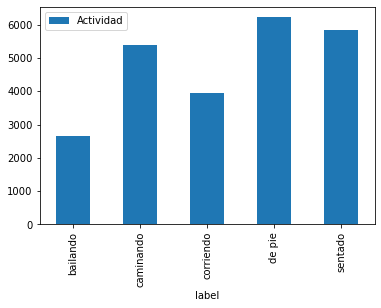

In [176]:
# leemos desde la hoja 2 la variable que contiene la actividad  
# y graficamos el número de registros por cada clase
y_ah = pd.read_excel('ActividadHumanas.xlsx',sheet_name=1);
y_ah.groupby('label').count().plot(kind = 'bar');

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

<h1 style="text-align:center">
CUESTIONARIO
</h1>

<h1 style="color:red">
Pregunta 1.-
</h1>
<h4 style="color:#000080">
Separar la data en 60% para entrenamiento y 40% para prueba y correr los siguientes modelos.
<br>
<ol>
   <li>Regresión logística.</li>
  <li> KNN.</li>
  <li>Redes Neuronales.</li>
</ol>
Para cada algoritmo, defina al menos dos parámetros explicando que significa.
</h4>

<h3>
<span style="color:black">Separacion de la data - Entrenamiento, Prueba</span>
</h3>

In [124]:
df=x_ah.drop('label',axis=1);
var = df.to_numpy()
clas = df.Actividad.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(var, clas, test_size=0.4, random_state=0)

<h3>
<span style="color:green">Modelo: Regresión Logística</span>
</h3>

In [125]:
from sklearn.linear_model import LogisticRegression
# El parámetro max_iter nos permite definir el número de interaciones a 10000
# solver es el parámetro que permite la optimización del algoritmo
# Para conjuntos de datos grandes se utiliza 'sag' y 'saga' 
logisticRegr = LogisticRegression(max_iter=10000, solver='saga')
# Entrenamos el modelo de regresión logística para muchas clases porque detrás corre uno versus todos
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [14]:
# Retornamos un arreglo NumPy
# Predicimos para una observación (una registro o imagen)
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([3, 3, 2, 2, 1, 1, 4, 1, 1, 3], dtype=int64)

In [60]:
#Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. 
#Los modelos de regresión logística devuelven la probabilidad de pertenecer a la clase de referencia
predictions_log_test = logisticRegr.predict(x_test)
predictions_log_train = logisticRegr.predict(x_train)

<h3>
<span style="color:blue">Modelo: KNN</span>
</h3>

In [126]:
from sklearn.neighbors import KNeighborsClassifier
#utilizamos la clase KNeighborsClassifier de SciKit Learn puesto que nuestras etiquetas son valores discretos
#(actividades humanas numeradas del 1 al 5).
# El parámetro n_neighbors debe ser el del número de vecinos o K
# p,metric son parámetros que definen la distancia que utilizará el modelo para verificar los vecinos del dato que se va a predecir.
#Por defecto la primera es “p=2” y la segunda es “metric=minkowski”.
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
#Entrenamos el modelo de vecinos cercanos
knn.fit(x_train, y_train)
print('porcentaje de aciertos entrenamiento: %5.2f' %knn.score(x_train, y_train))
print('porcentaje de aciertos Prueba:        %5.2f' %knn.score(x_test, y_test))
#Vemos que la precisión que nos da es de 98% en el set de entrenamiento y prueba.

porcentaje de aciertos entrenamiento:  0.98
porcentaje de aciertos Prueba:         0.98


In [61]:
predictions_knn_test = knn.predict(x_test)
predictions_knn_train = knn.predict(x_train)

<h3>
    <span style="color:brown">Modelo: Redes Neuronales</span>
</h3>

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
# Algunos algoritmos son sensible a los datos con atributos de dimensiones diferentes, para esto se debe escalar los datos 
scaler = StandardScaler()
# Con los datos escalados, ajustamos en modelo con los datos de entrenamieto
scaler.fit(x_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [81]:
#El parámetro max_iter define el número máximo de iteraciones.
#El solucionador itera hasta la convergencia (determinada por 'tol') o este número de iteraciones.
#El parámetro hidden_layer_sizes representa una tupla, longitud = n_layers-2
#Donde el elemento i-ésimo representa el número de neuronas en la i-ésima capa oculta.

#Definimos el pmc con 13 neuronas en la entrada y primera y segunda capa oculta y el número máximo de iteraciones en 500
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [83]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [85]:
# calculamos la predicción con los datos de prueba
predictions_red_test   = mlp.predict(x_test)
predictions_red_train = mlp.predict(x_train)

<h1 style="color:red">
Pregunta 2.-
</h1>
<h4 style="color:#000080">
Calcule la exactitud, precisión y recuerdo para los modelos resultantes tanto para datos de prueba como de entrenamiento.  Preséntelos en una tabla con una columna para cada modelo:
</h4>

<h3>
<span style="color:green">Cálculos: Regresión Logística</span>
</h3>

**Matriz de confusión**

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

print('Datos de Prueba:')
print(metrics.confusion_matrix(y_test, predictions_log_test))
print('\nDatos de Entrenamiento:')
print(metrics.confusion_matrix(y_train, predictions_log_train))

Datos de Prueba:
[[2353    0    3    0    0]
 [   6 2483    8    0    0]
 [   0    8 2150    2    0]
 [   0    1   13 1510   25]
 [   0    5    4   44 1015]]

Datos de Entrenamiento:
[[3493    0    1    0    0]
 [   3 3712    8    0    0]
 [   1   12 3223    0    0]
 [   0    1   23 2337   46]
 [   0    3    5   60 1517]]


**Reporte de las métricas**

In [66]:
print('Datos de Prueba:')
print(metrics.classification_report(y_test, predictions_log_test))
print('\nDatos de Entrenamiento:')
print(metrics.classification_report(y_train, predictions_log_train))

Datos de Prueba:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2356
           2       0.99      0.99      0.99      2497
           3       0.99      1.00      0.99      2160
           4       0.97      0.97      0.97      1549
           5       0.98      0.95      0.96      1068

    accuracy                           0.99      9630
   macro avg       0.99      0.98      0.98      9630
weighted avg       0.99      0.99      0.99      9630


Datos de Entrenamiento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3494
           2       1.00      1.00      1.00      3723
           3       0.99      1.00      0.99      3236
           4       0.97      0.97      0.97      2407
           5       0.97      0.96      0.96      1585

    accuracy                           0.99     14445
   macro avg       0.99      0.98      0.98     14445
weighted avg       0.99      0.99  

**Exactitud**

In [67]:
from sklearn.metrics import accuracy_score
exactitud_log_test = accuracy_score(predictions_log_test, y_test)
exactitud_log_train  = accuracy_score(predictions_log_train, y_train)
print('Exactitud del modelo - Prueba:')
print(exactitud_log_test)
print('\nExactitud del modelo - Entrenamiento:')
print(exactitud_log_train)

Exactitud del modelo - Prueba:
0.9876427829698857

Exactitud del modelo - Entrenamiento:
0.9887158186223607


**Precisión**

In [68]:
from sklearn.metrics import precision_score
precision_log_test = precision_score(predictions_log_test, y_test, average='macro')
precision_log_train  = precision_score(predictions_log_train, y_train, average='macro')
print('Precisión del modelo - Prueba:')
print(precision_log_test)
print('\nPrecisión del modelo - Entrenamiento:')
print(precision_log_train)

Precisión del modelo - Prueba:
0.9827374591174202

Precisión del modelo - Entrenamiento:
0.9841515660880372


**Sensibilidad**

In [69]:
from sklearn.metrics import recall_score
sensibilidad_log_test = recall_score(predictions_log_test, y_test, average='macro')
sensibilidad_log_train  = recall_score(predictions_log_train, y_train, average='macro')
print('Sensibilidad del modelo - Prueba:')
print(sensibilidad_log_test)
print('\nSensibilidad del modelo - Entrenamiento:')
print(sensibilidad_log_train)

Sensibilidad del modelo - Prueba:
0.9850785093460784

Sensibilidad del modelo - Entrenamiento:
0.9857505504709516


**Puntaje F1**

In [70]:
from sklearn.metrics import f1_score
f1score_log_test = f1_score(predictions_log_test, y_test, average='macro')
f1score_log_train  = f1_score(predictions_log_train, y_train, average='macro')
print('Puntaje F1 del modelo - Prueba:')
print(f1score_log_test)
print('\nPuntaje F1 del modelo - Entrenamiento:')
print(f1score_log_train)

Puntaje F1 del modelo - Prueba:
0.9838695148533215

Puntaje F1 del modelo - Entrenamiento:
0.9849379648352702


<h3>
<span style="color:blue">Cálculos: KNN</span>
</h3>

**Matriz de confusión**

In [71]:
print('Datos de Prueba:')
print(metrics.confusion_matrix(y_test, predictions_knn_test))
print('\nDatos de Entrenamiento:')
print(metrics.confusion_matrix(y_train, predictions_knn_train))

Datos de Prueba:
[[2352    0    4    0    0]
 [   4 2491    2    0    0]
 [   0    8 2150    0    2]
 [   0    1   10 1466   72]
 [   0    0    1  129  938]]

Datos de Entrenamiento:
[[3493    0    1    0    0]
 [   3 3716    4    0    0]
 [   0   12 3224    0    0]
 [   0    1   17 2309   80]
 [   0    0    3  126 1456]]


**Reporte de las métricas**

In [92]:
print('Datos de Prueba:')
print(metrics.classification_report(y_test, predictions_knn_test))
print('\nDatos de Entrenamiento:')
print(metrics.classification_report(y_train, predictions_knn_train))

Datos de Prueba:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2356
           2       1.00      1.00      1.00      2497
           3       0.99      1.00      0.99      2160
           4       0.92      0.95      0.93      1549
           5       0.93      0.88      0.90      1068

    accuracy                           0.98      9630
   macro avg       0.97      0.96      0.96      9630
weighted avg       0.98      0.98      0.98      9630


Datos de Entrenamiento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3494
           2       1.00      1.00      1.00      3723
           3       0.99      1.00      0.99      3236
           4       0.95      0.96      0.95      2407
           5       0.95      0.92      0.93      1585

    accuracy                           0.98     14445
   macro avg       0.98      0.97      0.98     14445
weighted avg       0.98      0.98  

**Exactitud**

In [73]:
exactitud_knn_test = accuracy_score(predictions_knn_test, y_test)
exactitud_knn_train  = accuracy_score(predictions_knn_train, y_train)
print('Exactitud del modelo - Prueba:')
print(exactitud_knn_test)
print('\nExactitud del modelo - Entrenamiento:')
print(exactitud_knn_train)

Exactitud del modelo - Prueba:
0.9758047767393562

Exactitud del modelo - Entrenamiento:
0.9829006576670128


**Precisión**

In [74]:
precision_knn_test = precision_score(predictions_knn_test, y_test, average='macro')
precision_knn_train  = precision_score(predictions_knn_train, y_train, average='macro')
print('Precisión del modelo - Prueba:')
print(precision_knn_test)
print('\nPrecisión del modelo - Entrenamiento:')
print(precision_knn_train)

Precisión del modelo - Prueba:
0.9631927781705425

Precisión del modelo - Entrenamiento:
0.9744045428050617


**Sensibilidad**

In [75]:
sensibilidad_knn_test = recall_score(predictions_knn_test, y_test, average='macro')
sensibilidad_knn_train  = recall_score(predictions_knn_train, y_train, average='macro')
print('Sensibilidad del modelo - Prueba:')
print(sensibilidad_knn_test)
print('\nSensibilidad del modelo - Entrenamiento:')
print(sensibilidad_knn_train)

Sensibilidad del modelo - Prueba:
0.9665713975217024

Sensibilidad del modelo - Entrenamiento:
0.9768264597216951


**Puntaje F1**

In [76]:
f1score_knn_test = f1_score(predictions_knn_test, y_test, average='macro')
f1score_knn_train  = f1_score(predictions_knn_train, y_train, average='macro')
print('Puntaje F1 del modelo - Prueba:')
print(f1score_knn_test)
print('\nPuntaje F1 del modelo - Entrenamiento:')
print(f1score_knn_train)

Puntaje F1 del modelo - Prueba:
0.9647107136918454

Puntaje F1 del modelo - Entrenamiento:
0.9755621690249374


<h3>
<span style="color:brown">Cálculos: Redes Neuronales</span>
</h3>

**Matriz de confusión**

In [86]:
print('Datos de Prueba:')
print(metrics.confusion_matrix(y_test, predictions_red_test))
print('\nDatos de Entrenamiento:')
print(metrics.confusion_matrix(y_train, predictions_red_train))

Datos de Prueba:
[[2351    5    0    0    0]
 [   0 2496    1    0    0]
 [   0    2 2151    3    4]
 [   0    0    4 1544    1]
 [   0    0    0   10 1058]]

Datos de Entrenamiento:
[[3483   11    0    0    0]
 [   0 3723    0    0    0]
 [   0    1 3235    0    0]
 [   0    0    1 2405    1]
 [   0    0    0    6 1579]]


**Reporte de las métricas**

In [87]:
print('Datos de Prueba:')
print(metrics.classification_report(y_test, predictions_red_test))
print('\nDatos de Entrenamiento:')
print(metrics.classification_report(y_train, predictions_red_train))

Datos de Prueba:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2356
           2       1.00      1.00      1.00      2497
           3       1.00      1.00      1.00      2160
           4       0.99      1.00      0.99      1549
           5       1.00      0.99      0.99      1068

    accuracy                           1.00      9630
   macro avg       1.00      1.00      1.00      9630
weighted avg       1.00      1.00      1.00      9630


Datos de Entrenamiento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3494
           2       1.00      1.00      1.00      3723
           3       1.00      1.00      1.00      3236
           4       1.00      1.00      1.00      2407
           5       1.00      1.00      1.00      1585

    accuracy                           1.00     14445
   macro avg       1.00      1.00      1.00     14445
weighted avg       1.00      1.00  

**Exactitud**

In [88]:
exactitud_red_test = accuracy_score(predictions_red_test, y_test)
exactitud_red_train  = accuracy_score(predictions_red_train, y_train)
print('Exactitud del modelo - Prueba:')
print(exactitud_red_test)
print('\nExactitud del modelo - Entrenamiento:')
print(exactitud_red_train)

Exactitud del modelo - Prueba:
0.9968847352024922

Exactitud del modelo - Entrenamiento:
0.9986154378677743


**Precisión**

In [89]:
precision_red_test = precision_score(predictions_red_test, y_test, average='macro')
precision_red_train  = precision_score(predictions_red_train, y_train, average='macro')
print('Precisión del modelo - Prueba:')
print(precision_red_test)
print('\nPrecisión del modelo - Entrenamiento:')
print(precision_red_train)

Precisión del modelo - Prueba:
0.9961438853658569

Precisión del modelo - Entrenamiento:
0.9983852647117943


**Sensibilidad**

In [90]:
sensibilidad_red_test = recall_score(predictions_red_test, y_test, average='macro')
sensibilidad_red_train  = recall_score(predictions_red_train, y_train, average='macro')
print('Sensibilidad del modelo - Prueba:')
print(sensibilidad_red_test)
print('\nSensibilidad del modelo - Entrenamiento:')
print(sensibilidad_red_train)

Sensibilidad del modelo - Prueba:
0.9963662375593747

Sensibilidad del modelo - Entrenamiento:
0.9986713239543533


**Puntaje F1**

In [91]:
f1score_red_test = f1_score(predictions_red_test, y_test, average='macro')
f1score_red_train  = f1_score(predictions_red_train, y_train, average='macro')
print('Puntaje F1 del modelo - Prueba:')
print(f1score_red_test)
print('\nPuntaje F1 del modelo - Entrenamiento:')
print(f1score_red_train)

Puntaje F1 del modelo - Prueba:
0.9962519648393903

Puntaje F1 del modelo - Entrenamiento:
0.9985266453636037


**Construcción Tabla**

In [150]:
import pandas as pd
df = pd.DataFrame()

df['Resultados'] = ['Exactitud-Test', 'Exactitud-Train','Precisión-Test','Precisión-Train', 'Recuerdo-Test','Recuerdo-Train','PuntajeF1-Test','PuntajeF1-Train']
df['Regresión Logística'] = [exactitud_log_test,exactitud_log_train,precision_log_test,precision_log_train,sensibilidad_log_test,sensibilidad_log_train,f1score_log_test,f1score_log_train]
df['Vecinos Cercanos'] = [exactitud_knn_test,exactitud_knn_train,precision_knn_test,precision_knn_train,sensibilidad_knn_test,sensibilidad_knn_train,f1score_knn_test,f1score_knn_train]
df['Redes Neuronales'] = [exactitud_red_test,exactitud_red_train,precision_red_test,precision_red_train,sensibilidad_red_test,sensibilidad_red_train,f1score_red_test,f1score_red_train]

import seaborn as sns
cm = sns.light_palette("#2ECC71", as_cmap=True)

<h1>
<span style="color:#2ECC71">Tabla de Resultados</span>
</h1>

In [151]:
df.style.background_gradient (cmap = cm)

,Resultados,Regresión Logística,Vecinos Cercanos,Redes Neuronales
0,Exactitud-Test,0.987643,0.975805,0.996885
1,Exactitud-Train,0.988716,0.982901,0.998615
2,Precisión-Test,0.982737,0.963193,0.996144
3,Precisión-Train,0.984152,0.974405,0.998385
4,Recuerdo-Test,0.985079,0.966571,0.996366
5,Recuerdo-Train,0.985751,0.976826,0.998671
6,PuntajeF1-Test,0.983870,0.964711,0.996252
7,PuntajeF1-Train,0.984938,0.975562,0.998527


<h1 style="color:red">
Pregunta 3.-
</h1>
<h4 style="color:#000080">
Use PCA con 5 variables (conserva el 99% de la información) y vuelva a correr los algoritmos anteriores y calcule las métricas presentelas como en la pregunta 2
</h4>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# importamos librerías para calcular las métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,median_absolute_error
from sklearn.model_selection import cross_val_score

In [119]:
data = x_ah.iloc[:, -6:]
data= data.drop('label',axis=1);
# la librería PCA, permite reducir la dimensión de la data a cualquier dimensión 1 o más, sin embargo es necesario tener 
# presente que porcentaje de información se conserva ( o se pirede al realizar este proceso)
# para este ejemplo reducimos a dos dimensiones, porque el objetivo es visualizar las fronteras de decisión de los clasificadores

pca2 = PCA(n_components=2)
pca=pca2.fit_transform(data)
print(pca2.n_components_)
print(pca2.n_features_)

x=pca;
y=data.iloc[:,4]

x1_train, x1_test, y1_train, y1_test = train_test_split(pca, y, random_state=0)

2
5


<h3>
<span style="color:green">Modelo: Regresión Logística</span>
</h3>

In [216]:
from sklearn.linear_model import LogisticRegression
# Definimos el número de interacciones a 10000
logisticRegr = LogisticRegression(max_iter=10000, solver='saga')
# Entrenamos el modelo de regresión logística para muchas clases porque detrás corre uno versus todos
logisticRegr.fit(x1_train, y1_train)

LogisticRegression(max_iter=10000, solver='saga')

In [217]:
# Retornamos un arreglo NumPy
# Predicimos para una observación (una registro o imagen)
logisticRegr.predict(x1_test[0].reshape(1,-1))
logisticRegr.predict(x1_test[0:10])

array([3, 3, 2, 2, 1, 1, 4, 1, 2, 3], dtype=int64)

In [218]:
predictions_log_test = logisticRegr.predict(x1_test)
predictions_log_train = logisticRegr.predict(x1_train)

**Cálculos: Exactitud, Precisión, Sensibilidad, Puntaje F1**

In [254]:
#Métricas que nos permiten evaluar el rendimiento del modelo construido
exactitud_log_test = accuracy_score(predictions_log_test, y1_test)
exactitud_log_train  = accuracy_score(predictions_log_train, y1_train)
print('Exactitud del modelo - Prueba:')
print(exactitud_log_test)
print('Exactitud del modelo - Entrenamiento:')
print(exactitud_log_train)

precision_log_test = precision_score(predictions_log_test, y1_test, average='macro')
precision_log_train  = precision_score(predictions_log_train, y1_train, average='macro')
print('\nPrecisión del modelo - Prueba:')
print(precision_log_test)
print('Precisión del modelo - Entrenamiento:')
print(precision_log_train)

sensibilidad_log_test = recall_score(predictions_log_test, y1_test, average='macro')
sensibilidad_log_train  = recall_score(predictions_log_train, y1_train, average='macro')
print('\nSensibilidad del modelo - Prueba:')
print(sensibilidad_log_test)
print('Sensibilidad del modelo - Entrenamiento:')
print(sensibilidad_log_train)

f1score_log_test = f1_score(predictions_log_test, y1_test, average='macro')
f1score_log_train  = f1_score(predictions_log_train, y1_train, average='macro')
print('\nPuntaje F1 del modelo - Prueba:')
print(f1score_log_test)
print('Puntaje F1 del modelo - Entrenamiento:')
print(f1score_log_train)

Exactitud del modelo - Prueba:
0.7873400897158996
Exactitud del modelo - Entrenamiento:
0.7858329641116526

Precisión del modelo - Prueba:
0.7205728991072134
Precisión del modelo - Entrenamiento:
0.7214034144603233

Sensibilidad del modelo - Prueba:
0.7255499290187518
Sensibilidad del modelo - Entrenamiento:
0.7250179738904741

Puntaje F1 del modelo - Prueba:
0.7168931515098469
Puntaje F1 del modelo - Entrenamiento:
0.7173598788046497


<h3>
<span style="color:blue">Modelo: KNN</span>
</h3>

In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x1_train, y1_train)
print('porcentaje de aciertos entrenamiento: %5.2f' %knn.score(x1_train, y1_train))
print('porcentaje de aciertos Prueba:        %5.2f' %knn.score(x1_test, y1_test))

porcentaje de aciertos entrenamiento:  0.92
porcentaje de aciertos Prueba:         0.88


In [221]:
predictions_knn_test = knn.predict(x1_test)
predictions_knn_train = knn.predict(x1_train)

**Cálculos: Exactitud, Precisión, Sensibilidad, Puntaje F1**

In [253]:
#Métricas que nos permiten evaluar el rendimiento del modelo construido
exactitud_knn_test = accuracy_score(predictions_knn_test, y1_test)
exactitud_knn_train  = accuracy_score(predictions_knn_train, y1_train)
print('Exactitud del modelo - Prueba:')
print(exactitud_knn_test)
print('Exactitud del modelo - Entrenamiento:')
print(exactitud_knn_train)

precision_knn_test = precision_score(predictions_knn_test, y1_test, average='macro')
precision_knn_train  = precision_score(predictions_knn_train, y1_train, average='macro')
print('\nPrecisión del modelo - Prueba:')
print(precision_knn_test)
print('Precisión del modelo - Entrenamiento:')
print(precision_knn_train)

sensibilidad_knn_test = recall_score(predictions_knn_test, y1_test, average='macro')
sensibilidad_knn_train  = recall_score(predictions_knn_train, y1_train, average='macro')
print('\nSensibilidad del modelo - Prueba:')
print(sensibilidad_knn_test)
print('Sensibilidad del modelo - Entrenamiento:')
print(sensibilidad_knn_train)

f1score_knn_test = f1_score(predictions_knn_test, y1_test, average='macro')
f1score_knn_train  = f1_score(predictions_knn_train, y1_train, average='macro')
print('\nPuntaje F1 del modelo - Prueba:')
print(f1score_knn_test)
print('Puntaje F1 del modelo - Entrenamiento:')
print(f1score_knn_train)

Exactitud del modelo - Prueba:
0.8827047682339259
Exactitud del modelo - Entrenamiento:
0.9155405405405406

Precisión del modelo - Prueba:
0.8222467107987173
Precisión del modelo - Entrenamiento:
0.872152075167671

Sensibilidad del modelo - Prueba:
0.8278360923169611
Sensibilidad del modelo - Entrenamiento:
0.8852359390488426

Puntaje F1 del modelo - Prueba:
0.8210061121297457
Puntaje F1 del modelo - Entrenamiento:
0.8751366761261645


<h3>
    <span style="color:brown">Modelo: Redes Neuronales</span>
</h3>

In [222]:
# Algunos algoritmos son sensible a los datos con atributos de dimensiones diferentes, para esto se debe escalar los datos 
scaler = StandardScaler()
# Con los datos escalados, ajustamos en modelo con los datos de entrenamieto
scaler.fit(x1_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(x1_train)
X_test = scaler.transform(x1_test)

In [223]:
# definimos el pmc con 13 neuronas en la entrada y primera y segunda capa oculta y el número máximo de iteraciones en 500
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [224]:
mlp.fit(x1_train,y1_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [226]:
# calculamos la predicción con los datos de prueba
predictions_red_test   = mlp.predict(x1_test)
predictions_red_train = mlp.predict(x1_train)

**Cálculos: Exactitud, Precisión, Sensibilidad, Puntaje F1**

In [252]:
#Métricas que nos permiten evaluar el rendimiento del modelo construido
exactitud_red_test = accuracy_score(predictions_red_test, y1_test)
exactitud_red_train  = accuracy_score(predictions_red_train, y1_train)
print('Exactitud del modelo - Prueba:')
print(exactitud_red_test)
print('Exactitud del modelo - Entrenamiento:')
print(exactitud_red_train)

precision_red_test = precision_score(predictions_red_test, y1_test, average='macro')
precision_red_train  = precision_score(predictions_red_train, y1_train, average='macro')
print('\nPrecisión del modelo - Prueba:')
print(precision_red_test)
print('Precisión del modelo - Entrenamiento:')
print(precision_red_train)

sensibilidad_red_test = recall_score(predictions_red_test, y1_test, average='macro')
sensibilidad_red_train  = recall_score(predictions_red_train, y1_train, average='macro')
print('\nSensibilidad del modelo - Prueba:')
print(sensibilidad_red_test)
print('Sensibilidad del modelo - Entrenamiento:')
print(sensibilidad_red_train)

f1score_red_test = f1_score(predictions_red_test, y1_test, average='macro')
f1score_red_train  = f1_score(predictions_red_train, y1_train, average='macro')
print('\nPuntaje F1 del modelo - Prueba:')
print(f1score_red_test)
print('Puntaje F1 del modelo - Entrenamiento:')
print(f1score_red_train)

Exactitud del modelo - Prueba:
0.8861937198870244
Exactitud del modelo - Entrenamiento:
0.8860212671688081

Precisión del modelo - Prueba:
0.8235183055419947
Precisión del modelo - Entrenamiento:
0.826985625458254

Sensibilidad del modelo - Prueba:
0.8293239342487743
Sensibilidad del modelo - Entrenamiento:
0.8348215147786775

Puntaje F1 del modelo - Prueba:
0.8205794362164847
Puntaje F1 del modelo - Entrenamiento:
0.8253406385536932


**Construcción Tabla Métricas de precisión**

In [ ]:
import pandas as pd
df = pd.DataFrame()

df['Resultados'] = ['Exactitud-Test', 'Exactitud-Train','Precisión-Test','Precisión-Train', 'Recuerdo-Test','Recuerdo-Train','PuntajeF1-Test','PuntajeF1-Train']
df['Regresión Logística'] = [exactitud_log_test,exactitud_log_train,precision_log_test,precision_log_train,sensibilidad_log_test,sensibilidad_log_train,f1score_log_test,f1score_log_train]
df['Vecinos Cercanos'] = [exactitud_knn_test,exactitud_knn_train,precision_knn_test,precision_knn_train,sensibilidad_knn_test,sensibilidad_knn_train,f1score_knn_test,f1score_knn_train]
df['Redes Neuronales'] = [exactitud_red_test,exactitud_red_train,precision_red_test,precision_red_train,sensibilidad_red_test,sensibilidad_red_train,f1score_red_test,f1score_red_train]

import seaborn as sns
cm = sns.light_palette("#2ECC71", as_cmap=True)

<h1>
<span style="color:#2ECC71">Tabla de Resultados - Métricas Precisión</span>
</h1>

In [256]:
df.style.background_gradient (cmap = cm)

,Resultados,Regresión Logística,Vecinos Cercanos,Redes Neuronales
0,Exactitud-Test,0.787340,0.882705,0.886194
1,Exactitud-Train,0.785833,0.915541,0.886021
2,Precisión-Test,0.720573,0.822247,0.823518
3,Precisión-Train,0.721403,0.872152,0.826986
4,Recuerdo-Test,0.725550,0.827836,0.829324
5,Recuerdo-Train,0.725018,0.885236,0.834822
6,PuntajeF1-Test,0.716893,0.821006,0.820579
7,PuntajeF1-Train,0.717360,0.875137,0.825341


<h1 style="color:red">
Pregunta 4.-
</h1>
<h4 style="color:#000080">
Use el algoritmo k-medias y corra para 3 a 8 grupos, presente la curva Elbow y comente sobre los grupos:
</h4>

**Como primer punto, corremos el algoritmo kmedias para 3 grupos con sus respectivos pasos:**

In [208]:
data= x_ah.drop('label',axis=1);
y = data['Actividad']

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

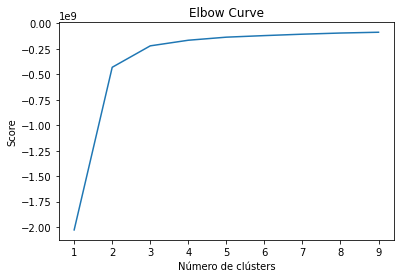

In [181]:
# Evaluación de la calidad del clúster
# 
# Cuando se utiliza técnicas de agrupación en clústeres como k-medias y modelos 
# gaussianos, se debe especificar el número de grupos. Sin embargo, 
# para datos de alta dimensión, es difícil determinar el número óptimo de conglomerados.
# 
# Existen algunas formas de tratar de determinar el número de grupos.


# Aquí se muestra un gráfico del puntaje (score). En este gráfico el número óptimo de grupos 
# aparece como un quiebre claro en la curva 
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clústers')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [182]:
#El parametro k_means representa al número de clústeres a formar, así como el número de centroides a generar.
# Del gráfico se puede apreciar que 2, 3 y 4 grupos son posibles en los datos
# Por tanto corremos k-medias para 3 clústeres
#Utilizaremos el parametro max_iterint, por defecto=300
#Número máximo de iteraciones del algoritmo k-means para una sola ejecución.
kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_
#print(centroids)
kmeans.n_features_in_
kmeans.n_init
kmeans.labels_.shape
#kmeans.inertia_
#kmeans.n_iter_

from sklearn.metrics import confusion_matrix
#y_test_pred = knn.predict(X_test)
confusion_matrix(y, kmeans.labels_+1)

#plt.scatter(y,kmeans.labels_)

array([[   0, 5850,    0,    0,    0],
       [   0, 6220,    0,    0,    0],
       [   0, 5396,    0,    0,    0],
       [3087,  178,  691,    0,    0],
       [1298,   99, 1256,    0,    0]], dtype=int64)

El resultado son 3 centroides en torno a los cuales se agrupan los puntos y las etiquetas para cada punto que indican a qué cluster pertenece dicho punto

In [183]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

Dibujamos ahora los puntos y los centroides, utilizando un color distinto para los puntos de cada cluster

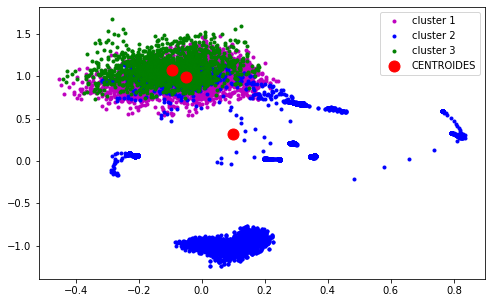

In [193]:
data = data.values
plt.figure(figsize=(8,5))
plt.plot(data[etiquetas==0,0],data[etiquetas==0,1],'mo',markersize=3,label='cluster 1')
plt.plot(data[etiquetas==1,0],data[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(data[etiquetas==2,0],data[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'r.',markersize=22, label='CENTROIDES')

plt.legend(loc='best')
plt.show()

**Una vez comprendido el proceso a llevar a cabo para correr el algoritmo kmedias con 3 grupos, ahora corrermos el mismo para 4 a 8 grupos:**

Para n_clusters = 4 El silhouette_score promedio es: 0.7639483750764428
Para n_clusters = 5 El silhouette_score promedio es: 0.752162862370265
Para n_clusters = 6 El silhouette_score promedio es: 0.7334139941718613
Para n_clusters = 7 El silhouette_score promedio es: 0.7377050643062928
Para n_clusters = 8 El silhouette_score promedio es: 0.6124051728608143


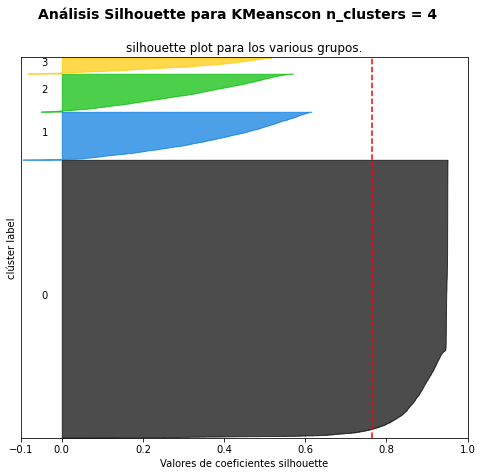

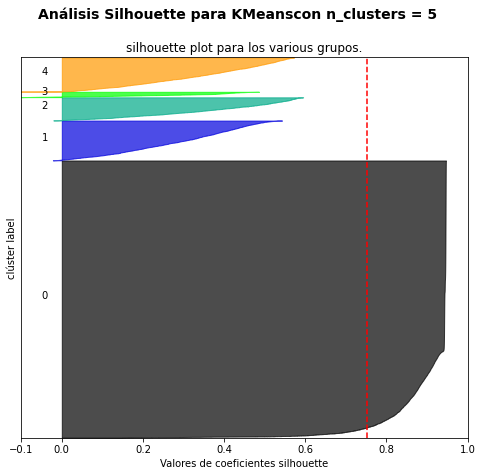

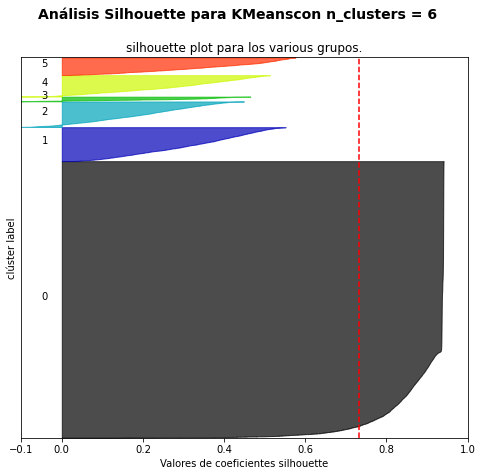

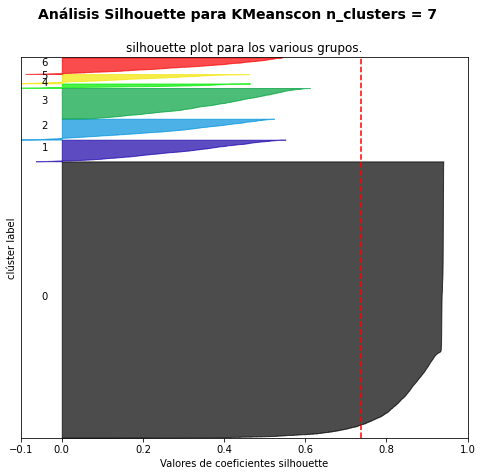

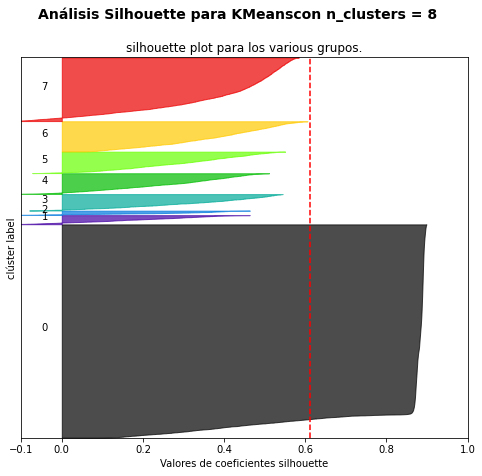

In [201]:
# Otro método, o complementario al score es utilizar los valores de silueta para juzgar la calidad de los clústeres. 
# El valor de la silueta de una observación es una medida normalizada (entre -1 y +1) 
# de qué tan cerca está esa observación de otras observaciones en el mismo grupo, 
# en comparación con las observaciones en diferentes grupos.

# Una gráfica de silueta muestra el valor de silueta de cada observación, agrupado por racimo
# Los esquemas de agrupación en clústeres en los que la mayoría de las observaciones
#  tienen un alto valor de silueta son deseables.

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Creamos un subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es:", silhouette_avg)

    # Calculo del score de la silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot para los various grupos.")
    ax1.set_xlabel("Valores de coeficientes silhouette")
    ax1.set_ylabel("clúster label")

    # Linea vertical para el promedio de silhouette score de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Etiquetando los clusters
    centers = clusterer.cluster_centers_


    plt.suptitle(("Análisis Silhouette para KMeans"
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<h1 style="color:red">
Pregunta 5.-
</h1>
<h4 style="color:#000080">
Use los datos de salida que dispone para comparar  el resultado de k-medias para 5 con los 5 que existen. Observe que tiene que ubicar que grupo de k-medias corresponde con qué salida:
</h4>

In [17]:
#El parametro k_means representa al número de clústeres a formar, así como el número de centroides a generar.
# Para el presente ejercicio se usarán 5 grupos, debido a que existen 5 clases
#Utilizaremos el parametro max_iterint, por defecto=300
#Número máximo de iteraciones del algoritmo k-means para una sola ejecución.
kmeans = KMeans(n_clusters=5).fit(data)
centroids = kmeans.cluster_centers_
#print(centroids)
kmeans.n_features_in_
kmeans.n_init
kmeans.labels_.shape
kmeans.inertia_
kmeans.n_iter_

from sklearn.metrics import confusion_matrix

confusion_matrix(y, kmeans.labels_+1)

array([[5850,    0,    0,    0,    0],
       [6220,    0,    0,    0,    0],
       [5396,    0,    0,    0,    0],
       [  55,  457, 1708,  143, 1593],
       [  59, 1002,  457,  203,  932]], dtype=int64)

In [18]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

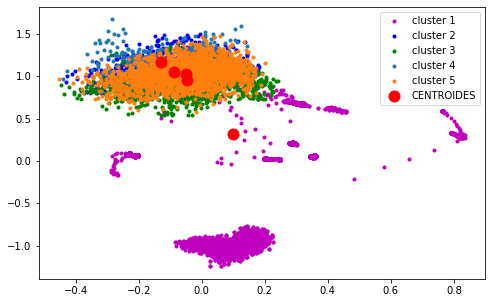

In [27]:
#Graficamos el diagrama de dispersión con los distintos grupos establecidos
data = data.values
plt.figure(figsize=(8,5))
plt.plot(data[etiquetas==0,0],data[etiquetas==0,1],'mo',markersize=3,label='cluster 1')
plt.plot(data[etiquetas==1,0],data[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(data[etiquetas==2,0],data[etiquetas==2,1],'g.', label='cluster 3')
plt.plot(data[etiquetas==3,0],data[etiquetas==3,1],'o',markersize=3, label='cluster 4')
plt.plot(data[etiquetas==4,0],data[etiquetas==4,1],'.', label='cluster 5')

plt.plot(centroides[:,0],centroides[:,1],'r.',markersize=22, label='CENTROIDES')

plt.legend(loc='best')
plt.show()

In [203]:
kmeans = KMeans(n_clusters=5).fit(data)
centroids = kmeans.cluster_centers_

In [205]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
# Definimos 5 categorías, 5 GRUPOS
categ=['0','1','2','3','4','5']

In [211]:
#Podemos ver cada uno de los clusters con su frecuencia de acuerdo a los grupos definidos (categ). Se han definido 5 grupos.
copy =  pd.DataFrame()
copy['categoria']=data['Actividad'].values
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Grupo']=categ
cantidadGrupo['cantidad']=copy.groupby('categoria').size()
cantidadGrupo
#Dataframe: características encontradas en cada uno de los clusters:

,Grupo,cantidad
0,0,NaN
1,1,5850.0
2,2,6220.0
3,3,5396.0
4,4,3956.0
5,5,2653.0


In [14]:
#Visualizamos las clases del dataframe de orígen, en el cual ya están definidas las clases. 
#Comparamos la data de los clusters con dicho dataframe, para determinar qué grupo de kmedias representa a cada actividades humana
y_ah.groupby('label').count()

,Actividad
label,
bailando,2653
caminando,5396
corriendo,3956
de pie,6220
sentado,5850


In [202]:
#Posterior a comparar las características de ambos dataframes se llega a la siguiente respuesta:

<h4 style="color:black">
<ul>
  <li>Grupo 1: <p style="color:#00aae4">Sentado -> 5850</p></li>
    <br>
  <li>Grupo 2: <p style="color:#00aae4">De pie -> 6220</p></li>
    <br>
  <li>Grupo 3: <p style="color:#00aae4">Caminando -> 5396</p></li>
    <br>
  <li>Grupo 4: <p style="color:#00aae4">Corriendo -> 3056</p></li>
    <br>
  <li>Grupo 5: <p style="color:#00aae4"> Bailando -> 2653</p></li>
    
</ul>
</h4>

<h1 style="color:red">
Pregunta 6.-
</h1>
<h4 style="color:#000080">
Presente cada modelo (con sus  parámetros) y comente:
</h4>

<h3>
<span style="color:green">Modelo: Regresión Logística</span>
</h3>

La aplicación del algoritmo de regresión logística en el presente caso de estudio de actividad humana permite tomar varias entradas y hace uso de datos de acelariones para realizar predicciones sobre los resultados, como predecir entre diferentes actividades humanas, como bailar, caminar, correr, estar de pie y sentarse.

In [63]:
from sklearn.linear_model import LogisticRegression
# El parámetro max_iter nos permite definir el número de interaciones a 10000
# solver es el parámetro que permite la optimización del algoritmo
# Para conjuntos de datos grandes se utiliza 'sag' y 'saga' 
logisticRegr = LogisticRegression(max_iter=10000, solver='saga')
# Entrenamos el modelo de regresión logística para muchas clases porque detrás corre uno versus todos
logisticRegr.fit(x1_train, y1_train)

LogisticRegression(max_iter=10000, solver='saga')

In [64]:
# Retornamos un arreglo NumPy
# Predicimos para una observación (una registro o imagen)
logisticRegr.predict(x1_test[0].reshape(1,-1))
logisticRegr.predict(x1_test[0:10])

array([3, 3, 2, 2, 1, 1, 4, 1, 2, 3], dtype=int64)

In [117]:
#Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. 
#Los modelos de regresión logística devuelven la probabilidad de pertenecer a la clase de referencia
predictions_log_test = logisticRegr.predict(x1_test)
predictions_log_train = logisticRegr.predict(x1_train)

In [122]:
# Información del modelo
print("Intercept:", logisticRegr.intercept_)
print("Coeficiente:", list(zip(data.columns, logisticRegr.coef_.flatten(), )))
print("Accuracy de entrenamiento:", logisticRegr.score(x1_train, y1_train))

Intercept: [-3.05664983 -4.96177706  3.56774902  2.1090105   2.34166738]
Coeficiente: [('BodyAccYPowerBand3', -0.18481245091248402), ('BodyAccZPowerBand1', 0.5205617884584546), ('BodyAccZPowerBand2', -0.21974640824146577), ('BodyAccZPowerBand3', -1.2982481957172791), ('Actividad', 0.06199913175704054)]
Accuracy de entrenamiento: 0.7858329641116526


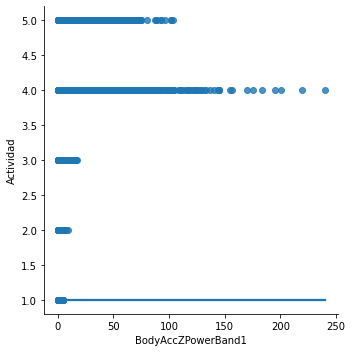

In [147]:
#La regresión logística predice el resultado de una variable categórica en función de un conjunto de variables independientes. 
#Puede obtenerse en seaborn añadiendo el argumento logistic = True a la función
sns.lmplot(x = "BodyAccZPowerBand1", y = "Actividad", data = X, logistic = True);

<h3>
<span style="color:blue">Modelo: KNN</span>
</h3>


La aplicación del algoritmo KNN en el presente problema de clasificación de actividad humana se baso en la proximidad para hacer clasificaciones o predicciones sobre la agrupación un conjunto de datos de entrada, como lo son datos de aceleraciones.

In [69]:
from sklearn.neighbors import KNeighborsClassifier
#utilizamos la clase KNeighborsClassifier de SciKit Learn puesto que nuestras etiquetas son valores discretos
#(actividades humanas numeradas del 1 al 5).
# El parámetro n_neighbors debe ser el del número de vecinos o K
# p,metric son parámetros que definen la distancia que utilizará el modelo para verificar los vecinos del dato que se va a predecir.
#Por defecto la primera es “p=2” y la segunda es “metric=minkowski”.
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
#Entrenamos el modelo de vecinos cercanos
knn.fit(x1_train, y1_train)
print('porcentaje de aciertos entrenamiento: %5.2f' %knn.score(x1_train, y1_train))
print('porcentaje de aciertos Prueba:        %5.2f' %knn.score(x1_test, y1_test))

porcentaje de aciertos entrenamiento:  0.92
porcentaje de aciertos Prueba:         0.88


In [70]:
predictions_knn_test = knn.predict(x1_test)
predictions_knn_train = knn.predict(x1_train)

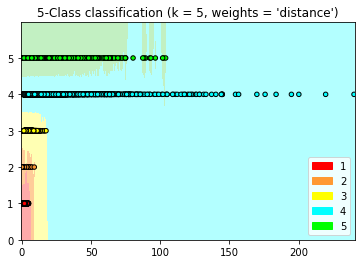

In [169]:
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh
n_neighbors = 5
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors = 5, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

<h3>
    <span style="color:brown">Modelo: Redes Neuronales</span>
</h3>


La aplicacion del modelo de redes neuronales - perceptron multicapa en el presente caso de estudio permite autoadaptar los pesos de las neuronas de las capas intermedias para aprender la relación que existe entre un conjunto de patrones dados como ejemplo y sus salidas correspondientes.

In [77]:
# Algunos algoritmos son sensible a los datos con atributos de dimensiones diferentes, para esto se debe escalar los datos 
scaler = StandardScaler()
# Con los datos escalados, ajustamos en modelo con los datos de entrenamieto
scaler.fit(x1_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(x1_train)
X_test = scaler.transform(x1_test)

{1: 5850, 2: 6220, 3: 5396, 4: 3956, 5: 2653}


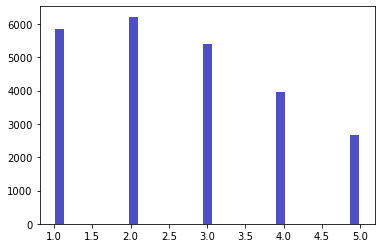

In [198]:
# Para resolver un problema de clasificación, es importante que las clases tengan un número parecido de registros. 
# un desvalanceo en el número de datos puede llevar a resultados errados
a = dict(Counter(y))
print(a)
n, bins, patches = plt.hist(x=y, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [78]:
#El parámetro max_iter define el número máximo de iteraciones.
#El solucionador itera hasta la convergencia (determinada por 'tol') o este número de iteraciones.
#El parámetro hidden_layer_sizes representa una tupla, longitud = n_layers-2
#Donde el elemento i-ésimo representa el número de neuronas en la i-ésima capa oculta.

#Definimos el pmc con 13 neuronas en la entrada y primera y segunda capa oculta y el número máximo de iteraciones en 500
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [79]:
mlp.fit(x1_train,y1_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [80]:
# calculamos la predicción con los datos de prueba
predictions_red_test   = mlp.predict(x1_test)
predictions_red_train = mlp.predict(x1_train)

In [199]:
# coefs_ es la lista de la matriz de pesos, 
# la matriz de peso en el índice i representa los pesos entre la capa i y la capa i + 1
len(mlp.coefs_)
#mlp.coefs_

4

In [200]:
mlp.coefs_[1]

array([[ 2.88031964e-01, -2.46631313e-01,  2.72377224e-01,
        -2.35702433e-01,  3.19270441e-01,  1.11622903e-01,
        -4.40593850e-01, -1.84740039e-01, -2.58583363e-01,
        -1.18683644e-01,  3.57412454e-01,  4.16590584e-01,
         3.58081186e-01],
       [ 4.39735113e-01,  1.24843479e-01, -3.28067068e-01,
        -4.80910661e-02, -3.60246154e-01,  2.89962891e-01,
         3.96605350e-01, -6.86129080e-02,  3.64174973e-01,
         3.72578918e-01, -2.21332602e-01, -5.33693353e-01,
         1.10844940e-01],
       [ 3.59175044e-01, -3.71888843e-01, -1.60854964e-02,
         2.29900153e-02, -8.36035307e-02, -3.56859564e-01,
         5.14210922e-01,  5.97477033e-02,  2.30869523e-01,
        -8.62964390e-02,  2.32465093e-01, -1.03430398e-01,
        -4.38888715e-01],
       [-7.50339498e-01, -2.02911440e-02,  3.11067200e-01,
        -4.48321694e-01,  1.32244753e-01,  3.35148567e-01,
         2.15190450e-01, -3.84528994e-01, -4.08559018e-01,
        -8.81129546e-02,  1.33495219e

<h3>
    <span style="color:red">Modelo: K Means</span>
</h3>


La aplicacion del algoritmo k-means en el presente caso de estudió toma los datos del dataframe propuesto y asigna un grupo o clúster de manera iterativa, con el propósito de asignar cada punto a un grupo en base a la similitud de sus características.

In [194]:
#El parametro k_means representa al número de clústeres a formar, así como el número de centroides a generar.
# corremos k-medias para 5 clústeres
#Utilizaremos el parametro max_iterint, por defecto=300
#Número máximo de iteraciones del algoritmo k-means para una sola ejecución.
kmeans = KMeans(n_clusters=5, max_iter=300).fit(data)
centroids = kmeans.cluster_centers_
#print(centroids)
kmeans.n_features_in_
kmeans.n_init
kmeans.labels_.shape
kmeans.inertia_
kmeans.n_iter_

18

Para n_clusters = 2 El silhouette_score promedio es: 0.8089983402410926
Para n_clusters = 3 El silhouette_score promedio es: 0.7938898827868366
Para n_clusters = 4 El silhouette_score promedio es: 0.7639483750764428
Para n_clusters = 5 El silhouette_score promedio es: 0.752162862370265
Para n_clusters = 6 El silhouette_score promedio es: 0.7334139941718613


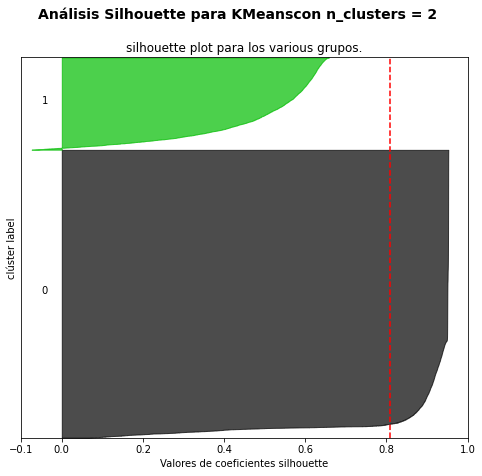

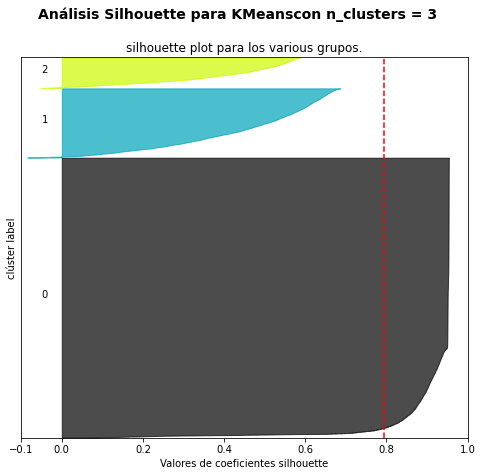

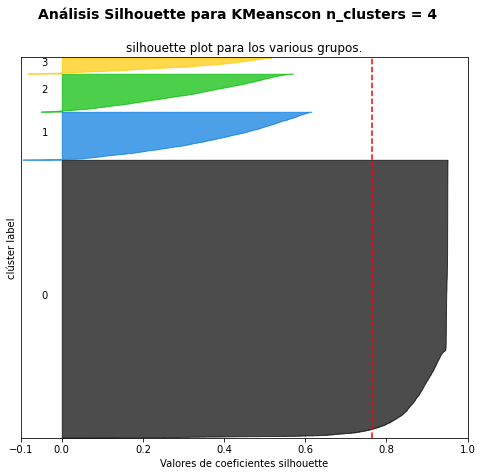

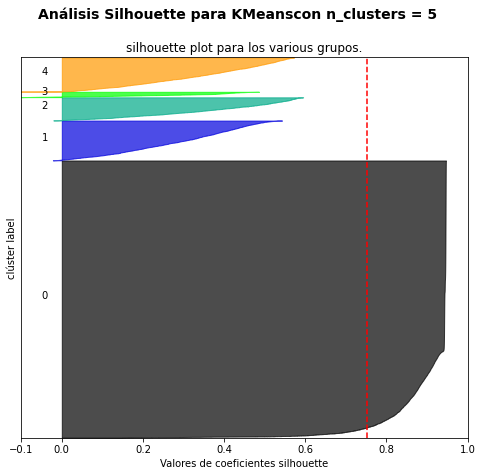

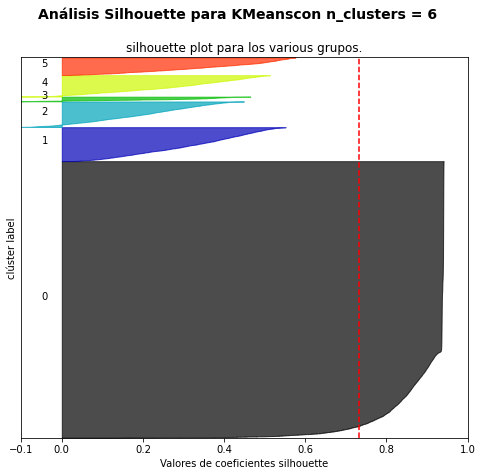

In [196]:
# Otro método, o complementario al score es utilizar los valores de silueta para juzgar la calidad de los clústeres. 
# El valor de la silueta de una observación es una medida normalizada (entre -1 y +1) 
# de qué tan cerca está esa observación de otras observaciones en el mismo grupo, 
# en comparación con las observaciones en diferentes grupos.

# Una gráfica de silueta muestra el valor de silueta de cada observación, agrupado por racimo
# Los esquemas de agrupación en clústeres en los que la mayoría de las observaciones
#  tienen un alto valor de silueta son deseables.

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Creamos un subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es:", silhouette_avg)

    # Calculo del score de la silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot para los various grupos.")
    ax1.set_xlabel("Valores de coeficientes silhouette")
    ax1.set_ylabel("clúster label")

    # Linea vertical para el promedio de silhouette score de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Etiquetando los clusters
    centers = clusterer.cluster_centers_


    plt.suptitle(("Análisis Silhouette para KMeans"
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<h1 style="color:red">
 Pregunta 7.-
</h1>
<h4 style="color:#000080">
Sus conclusiones
</h4>

<p style="color:black">
<ul>
  <li>La interacción de aprendizaje con el algoritmo kmedias permitió identificar que es necesario especificar el número de clusters que se requiere de manera correcta, dicha observación es el mayor inconveniente de este método, ya que si tomamos un número de clusters inadecuado el rendimiento del modelo se verá afectado.  Sin embargo, existen varios métodos para elegir el número óptimo de clústers, varios expertos recomiendan hacer uso de la técnica de la gráfica elbow, ya que es bastante útil.</li>
    <br>
  <li>El presente trabajo permitió una mejor visión y entendimiento de los algoritmos vistos en clase, por lo cual se logró comprobar que el algoritmo de regresión logística es bastante eficiente, debido a que no necesita de un gran uso de recursos computacionales, en virtud de que es posible interpretar fácilmente sus características de entrada. Además, de ser adecuado para presentar resultados de probabilidades pronosticadas adecuadamente calibradas.</li>
    <br>
  <li>Hacer uso del algoritmo knn en el presente caso de estudio, permitió comprender que a medida que aumentamos el valor de K, las predicciones se vuelven más estables, ya que existen más probabilidades de hacer predicciones mucho más precisas que las anteriores. Sin embargo, al momento de que comiencen a aparecer errores, se considera que se ha establecido el valor de k, a un valor muy alto y se lo debe disminuir.</li>
    <br>
  <li>La investigación que implicó el presente trabajo permitió adquirir información importante acerca de los distintas modelos, de la cual se puede destacar que el modelo de vecinos cercanos es aplicable para problemas de clasificación, regresión y búsqueda.</li>
    <br>    
</ul>
</p>